# Customer Segmentation using RFM Analytics
Customer Segmentation groups the customers into certain groups with respect to the Recency, Frequency and Monetary scores that are generated for the transactions they have made at an E-Commerce store. Segmenting Customers helps us gain insight into how much attention is required to be given for a specific customer. This also gives out the status of the sales at present.
# Segments for customers
We wil divide the customers among the following buckets depending on the RFM values.

<table style="display : block;width:70%;margin : auto;margin-top : 20px;">
<tr>
<th>Segment</th>
<th>R Score</th>
<th>F Score</th>
<th>M Score</th>
</tr>

<tr>
<td>Champions</td>
<td>4-5</td>
<td>4-5</td>
<td>4-5</td>
</tr>

<tr>
<td>Loyal Customers</td>
<td>2-5</td>
<td>3-5</td>
<td>3-5</td>
</tr>
    
<tr>
<td>Potential Loyalist</td>
<td>3-5</td>
<td>1-3</td>
<td>1-3</td>
</tr>

<tr>
<td>Recent Customers</td>
<td>4-5</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>Promising</td>
<td>3-4</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>Customers needing Attendtion</td>
<td>2-3</td>
<td>2-3</td>
<td>2-3</td>
</tr>

<tr>
<td>About to Sleep</td>
<td>2-3</td>
<td>1-2</td>
<td>1-2</td>
</tr>
    
<tr>
<td>At Risk</td>
<td>1-2</td>
<td>2-5</td>
<td>2-5</td>
</tr>
    
<tr>
<td>Can't Loose them</td>
<td>1</td>
<td>4-5</td>
<td>4-5</td>
</tr>
    
<tr>
<td>Hibernating</td>
<td>1-2</td>
<td>1-2</td>
<td>1-2</td>
</tr>
    
<tr>
<td>Hibernating</td>
<td>1</td>
<td>1-2</td>
<td>1-2</td>
</tr>
    
</table>
<i>*Credits to Alteryx Community for the above data</i>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## 1. Data Preparation
Import the dataset and perform the following operations to clean and prepare the data for analytics.
- Drop Null values
- Highlight the columns of interest

In [2]:
segments_list = ["Champions","Loyal Customers","Potential Loyalist","Recent Customers","Promising","Customers needing Attention","About to Sleep","At Risk","Can't Loose them","Hibernating"]
e_data = pd.read_csv("data.csv",encoding="unicode_escape",low_memory=False)
e_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,02-22-11,0.82,18087.0,United Kingdom
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,07-19-11,0.06,14609.0,United Kingdom
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,01-11-2011,2.10,15749.0,United Kingdom
3,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,04-18-11,2.10,15749.0,United Kingdom
4,560040,23343,came coded as 20713,3100,07-14-11,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
531273,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,12-09-2011,1.95,12748.0,United Kingdom
531274,581580,21351,CINAMMON & ORANGE WREATH,1,12-09-2011,6.75,12748.0,United Kingdom
531275,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,12-09-2011,2.95,12748.0,United Kingdom
531276,581580,22567,20 DOLLY PEGS RETROSPOT,1,12-09-2011,1.45,12748.0,United Kingdom


For the above dataset, our columns of interest are :
- Quantity
- UnitPrice
- InvoiceDate
- CustomerID

Check for missing values in these columns, if present drop the row.

In [3]:
print("Quantity : ",e_data['Quantity'].isnull().values.sum())
print("UnitPrice : ",e_data['UnitPrice'].isnull().values.sum())
print("InvoiceDate : ",e_data['InvoiceDate'].isnull().values.sum())
print("CustomerID : ",e_data['CustomerID'].isnull().values.sum())

Quantity :  0
UnitPrice :  0
InvoiceDate :  0
CustomerID :  133359


There is a huge number of missing CustomerIDs. Since this can't be guessed or filled manually, the best option would be to remove the rows.

In [4]:
e_data = e_data.dropna()

print("Quantity : ",e_data['Quantity'].isnull().values.sum())
print("UnitPrice : ",e_data['UnitPrice'].isnull().values.sum())
print("InvoiceDate : ",e_data['InvoiceDate'].isnull().values.sum())
print("CustomerID : ",e_data['CustomerID'].isnull().values.sum())

Quantity :  0
UnitPrice :  0
InvoiceDate :  0
CustomerID :  0


The InvoiceDate is in the format MM-DD-YYYY but there are few outliers with format MM-DD-YY. For consistency and easy calculation, change all the formats to MM-DD-YYYY. This will be used later for R Score Calculation.

In [5]:
inv_d = e_data['InvoiceDate']

inv_d_cleaned = []

for d in inv_d:
    M = d.split("-")[0]
    D = d.split("-")[1]
    Y = d.split("-")[2]
    if(len(str(Y)) == 2):
        Y = int(Y) + 2000
    inv_d_cleaned.append(str(M) + "-" + str(D) + "-" + str(Y))

#Drop the original InvoiceDate and add the modified date
e_data.drop("InvoiceDate",axis=1)
e_data['InvoiceDate'] = inv_d_cleaned
e_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,02-22-2011,0.82,18087.0,United Kingdom
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,07-19-2011,0.06,14609.0,United Kingdom
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,01-11-2011,2.10,15749.0,United Kingdom
3,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,04-18-2011,2.10,15749.0,United Kingdom
6,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,11-02-2011,0.32,16308.0,United Kingdom
...,...,...,...,...,...,...,...,...
531273,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,12-09-2011,1.95,12748.0,United Kingdom
531274,581580,21351,CINAMMON & ORANGE WREATH,1,12-09-2011,6.75,12748.0,United Kingdom
531275,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,12-09-2011,2.95,12748.0,United Kingdom
531276,581580,22567,20 DOLLY PEGS RETROSPOT,1,12-09-2011,1.45,12748.0,United Kingdom


# 2. Data Exploration
Perform Exploratory Analysis on the data and generate visualizations. This helps better understand the data and make reports as well.

Invoice Data : January 2011 - December 2011
Number of Items :  3664
Maximum Unit Price :  8142.75
Minimum Unit Price :  0.0
Number of customers :  4336
Number of Regions :  37
Highest Quantity purchased :  3906
Lowest Quantity purchased :  1


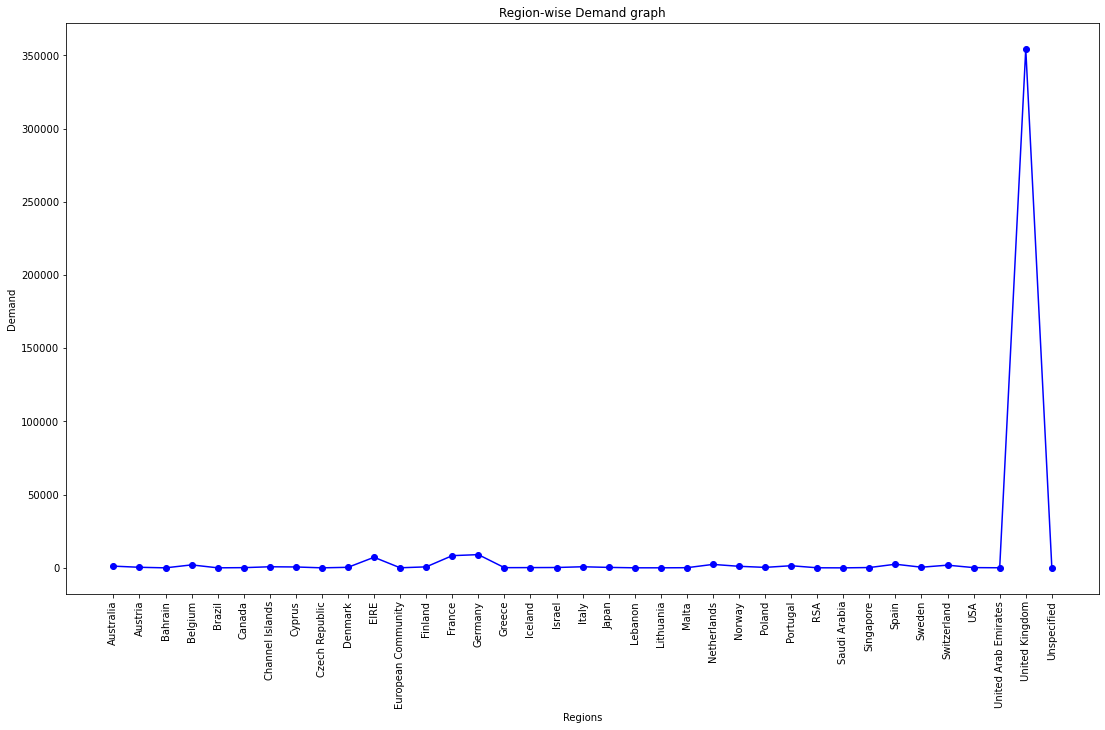

In [6]:
print("Invoice Data : January 2011 - December 2011")
print("Number of Items : ",len(np.unique(e_data['StockCode'].values)))
print("Maximum Unit Price : ",e_data['UnitPrice'].max())
print("Minimum Unit Price : ",e_data['UnitPrice'].min())
print("Number of customers : ",len(np.unique(e_data['CustomerID'].values)))
print("Number of Regions : ",len(np.unique(e_data['Country'].values)))
print("Highest Quantity purchased : ",e_data['Quantity'].values.max())
print("Lowest Quantity purchased : ",e_data['Quantity'].values.min())

reg,cnt = np.unique(e_data['Country'].values,return_counts=True)
plt.plot(reg,cnt,marker="o",color="b")
plt.title("Region-wise Demand graph")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18.5, 10.5)
plt.xlabel("Regions")
plt.ylabel("Demand")
plt.show()


United Kingdom has the highest number of orders followed by Germany, France and EIRE.

# Recency, Frequency and Monetary Score calculation.

Recency value (R) = Current_date = Invoice_date <br />
Frequency value (F) = Count(CustomerID) for each CustomerID <br />
Monetary value (M) = Unit_price * Quantity <br />

For converting value into score, bin these values in 5 bins.

In [7]:
#calculating F Score
#customer_count will be the F Score for each customer in customer_ids
customer_ids, F_Value = np.unique(e_data['CustomerID'].values,return_counts=True)

#calculating R Score
R_Value = []
for cid in customer_ids:
    dates = e_data['InvoiceDate'].values[np.where(e_data['CustomerID'] == cid)]
    for i in range(len(dates)):
        M = int(dates[i].split("-")[0])
        D = int(dates[i].split("-")[1])
        Y = int(dates[i].split("-")[2])
        
        dates[i] = (datetime.date.today() - datetime.date(Y,M,D)).total_seconds() / 86400
    
    R_Value.append(dates.min())

#calculating M Score
M_Value = []
value=0
for cid in customer_ids:
    q = e_data['Quantity'].values[np.where(e_data['CustomerID'] == cid)]
    c = e_data['UnitPrice'].values[np.where(e_data['CustomerID'] == cid)]
    
    for r in range(len(q)):
        value = value + (q[r] * c[r])
    M_Value.append(value)

With the generated R,F and M values, place all the values along with Customer IDs and its respective Country in a new DataFrame.

In [8]:
#Generate a new data frame
e_data_scores = pd.DataFrame()
e_data_scores['CustomerID'] = customer_ids
e_data_scores['R_Value'] = R_Value
e_data_scores['F_Value'] = F_Value
e_data_scores['M_Value'] = M_Value
e_data_scores['R_Score'] = pd.qcut(R_Value,q=5,labels=range(5,0,-1))
e_data_scores['F_Score'] = pd.qcut(F_Value,q=5,labels=range(1,6))
e_data_scores['M_Score'] = pd.qcut(M_Value,q=5,labels=range(1,6))

#Assigning segment names to customers
segments = []
for r,f,m in zip(e_data_scores['R_Score'].to_numpy(),e_data_scores['F_Score'].to_numpy(),e_data_scores['M_Score'].to_numpy()):
    if (r >= 4 and r <= 5) and (f >= 4 and f <= 5) and (m >= 4 and m <= 5):
        segments.append("Champions")
    elif (r >= 2 and r <= 5) and (f >= 3 and f <= 5) and (m >= 3 and m <= 5):
        segments.append("Loyal Customers")
    elif (r >= 3 and r <= 5) and (f >= 1 and f <= 3) and (m >= 1 and m <= 3):
        segments.append("Potential Loyalist")
    elif (r >= 4 and r <= 5) and (f == 1) and (m == 1):
        segments.append("Recent Customers")
    elif (r >= 3 and r <= 4) and (f == 1) and (m == 1):
        segments.append("Promising Customers")
    elif (r >= 2 and r <= 3) and (f >= 2 and f <= 3) and (m >= 2 and m <= 3):
        segments.append("Customers needing Attention")
    elif (r >= 2 and r <= 3) and (f >= 1 and f <= 2) and (m >= 1 and m <= 2):
        segments.append("About to Sleep")
    elif (r >= 1 and r <= 2) and (f >= 2 and f <= 5) and (m >= 2 and m <= 5):
        segments.append("At Risk")
    elif (r == 1) and (f >= 4 and f <= 5) and (m >= 4 and m <= 5):
        segments.append("Can't Loose them")
    elif (r >= 1 and r <= 2) and (f >= 1 and f <= 2) and (m >= 1 and m <= 2):
        segments.append("Hibernating")
    elif (r == 1) and (f >= 1 and f <= 2) and (m >= 1 and m <= 2):
        segments.append("Hibernating")
    else:
        segments.append("Customers needing Attention")

e_data_scores['Segment'] = segments

cntry = []
for cids in customer_ids:
     cntry.append(np.unique(e_data['Country'][e_data['CustomerID'] == cids].to_numpy())[0])

e_data_scores['Country'] = cntry

e_data_scores



,CustomerID,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Segment,Country
0,12347.0,3123.0,182,4.310000e+03,5,5,1,Customers needing Attention,Iceland
1,12348.0,3196.0,31,6.107240e+03,2,3,1,Customers needing Attention,Finland
2,12349.0,3139.0,73,7.864790e+03,4,4,1,Customers needing Attention,Italy
3,12350.0,3431.0,17,8.199190e+03,1,2,1,Hibernating,Norway
4,12352.0,3157.0,85,1.070523e+04,3,4,1,Customers needing Attention,Norway
...,...,...,...,...,...,...,...,...,...
4331,18280.0,3398.0,10,8.657460e+06,1,1,5,Customers needing Attention,United Kingdom
4332,18281.0,3301.0,7,8.657540e+06,1,1,5,Customers needing Attention,United Kingdom
4333,18282.0,3128.0,12,8.657719e+06,5,1,5,Customers needing Attention,United Kingdom
4334,18283.0,3124.0,756,8.659813e+06,5,5,5,Champions,United Kingdom


In [9]:
segs,count = np.unique(e_data_scores['Segment'],return_counts=True)
final = pd.DataFrame()
final['Segment'] = segs
final['Count'] = count

final

,Segment,Count
0,About to Sleep,137
1,At Risk,505
2,Champions,446
3,Customers needing Attention,1479
4,Hibernating,199
5,Loyal Customers,963
6,Potential Loyalist,607


Run a visualization on the generated dataset. This returns the count of customers per each segment.

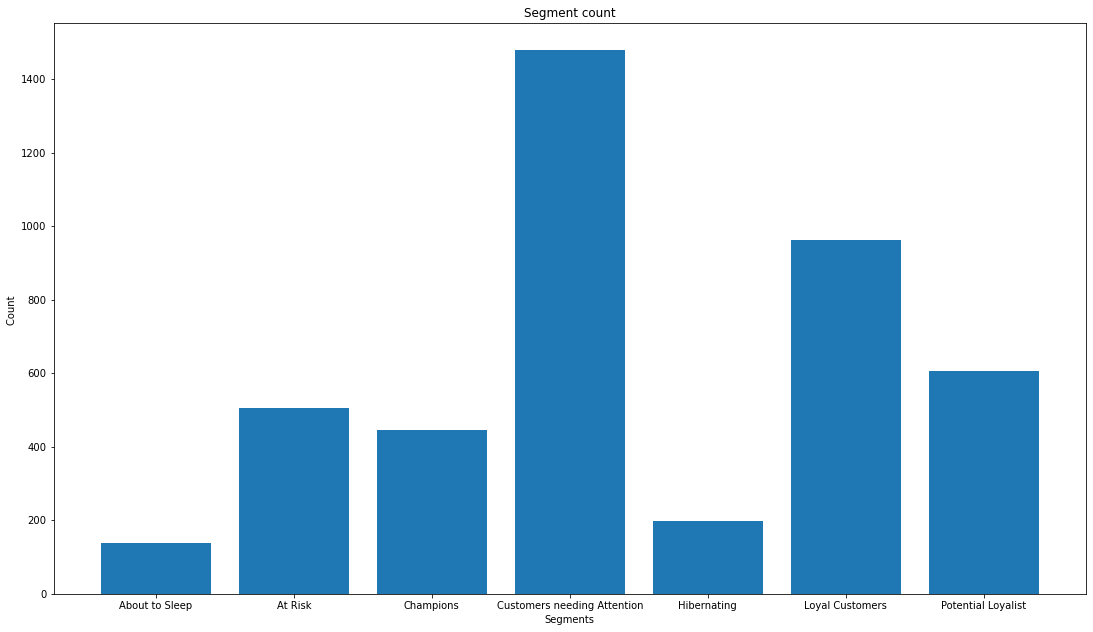

In [10]:
plt.bar(segs,count)
plt.gcf().set_size_inches(18.5, 10.5)
plt.xlabel("Segments")
plt.ylabel("Count ")
plt.title("Segment count")
plt.show()

Generate a dataset with each segment and count of customers in each segment in each Region. This helps in easy analysis of which region has what type of customers. From the belwo data, United kingdom has the most number of customers, but majority of them are Customers that require attention.

In [11]:
count_per_region = pd.DataFrame()
count_per_region['Segments'] = segments_list

for ctr in np.unique(e_data['Country'].to_numpy()):
    count_data = []
    for seg in segments_list:
        count=0
        temp = e_data_scores['Segment'][e_data_scores['Country'] == ctr].to_numpy()
        for items in temp:
            if items == seg:
                count = count + 1
        count_data.append(count)
        
    count_per_region[ctr] = count_data
count_per_region

,Segments,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,Champions,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,443,0
1,Loyal Customers,0,0,0,0,0,1,5,0,0,...,0,0,0,0,0,0,0,0,953,1
2,Potential Loyalist,0,2,0,3,0,0,0,1,1,...,1,0,0,10,3,3,2,0,509,0
3,Recent Customers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Promising,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Customers needing Attention,8,5,0,16,1,3,1,4,0,...,0,0,1,12,1,14,1,1,1265,2
6,About to Sleep,0,0,0,0,0,0,1,0,0,...,0,0,0,3,2,0,0,0,109,1
7,At Risk,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,498,0
8,Can't Loose them,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Hibernating,1,4,2,5,0,0,0,2,0,...,0,1,0,2,1,2,1,0,141,0


Convert all the above generated DataFrames to CSVs and save it for dashboard / report generation. The following three CSV files will be saved.
- RFM.csv - consists of CustomerIDs, RFM Scores and Values and their Country as well.
- segment_count.csv - Count of customers in each segment.
- Region_count.csv - Region wise count of customers in each segment.

In [12]:
#save all data to CSVs for generating dashboard
e_data_scores.to_csv("RFM.csv")
final.to_csv("segment_count.csv")
count_per_region.to_csv("Region_count.csv")